In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics


In [2]:
df = pd.read_csv("C:/data sets/Country-data.csv")

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
print('Shape:', df.shape)
print(df.info())

Shape: (167, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.5+ KB
None


In [5]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

________________________

In [6]:
#To convert %age to  values for 'exports', 'health', and 'imports' columns
df_corrected = df.copy()
df_corrected['exports'] = df_corrected['exports']*df_corrected['gdpp']/100
df_corrected['health'] = df_corrected['health']*df_corrected['gdpp']/100
df_corrected['imports'] = df_corrected['imports']*df_corrected['gdpp']/100
df_corrected.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [7]:
df_corrected2=df_corrected

In [8]:
df_corrected.describe(include = 'all')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Serbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000


In [9]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [10]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
df_corrected.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


### outliers

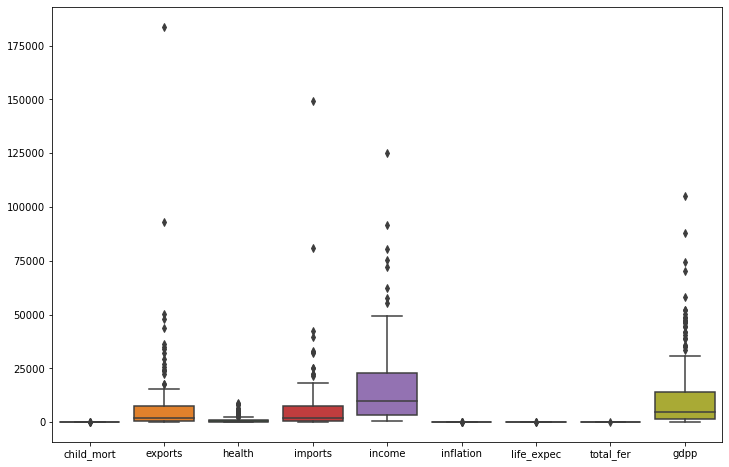

In [11]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=df_corrected)
plt.show()

In [12]:
#Countries above 95% percentile in the 'gdpp' column
print(list(df_corrected[df_corrected['gdpp'] > np.percentile(df_corrected.gdpp,95)]['country']))

['Australia', 'Denmark', 'Ireland', 'Luxembourg', 'Netherlands', 'Norway', 'Qatar', 'Sweden', 'Switzerland']


In [13]:
#Countries above 95% percentile in the 'income' column
print(list(df_corrected[df_corrected['income'] > np.percentile(df_corrected.income,95)]['country']))

['Brunei', 'Kuwait', 'Luxembourg', 'Norway', 'Qatar', 'Singapore', 'Switzerland', 'United Arab Emirates', 'United States']


In [14]:
#Countries above 95% percentile in the 'inflation' column
print(list(df_corrected[df_corrected['inflation'] > np.percentile(df_corrected.inflation,95)]['country']))

['Angola', 'Argentina', 'Equatorial Guinea', 'Mongolia', 'Nigeria', 'Sri Lanka', 'Timor-Leste', 'Venezuela', 'Yemen']


In [15]:
#Countries above 95% percentile in the 'health' column
print(list(df_corrected[df_corrected['health'] > np.percentile(df_corrected.health,95)]['country']))

['Austria', 'Canada', 'Denmark', 'Luxembourg', 'Netherlands', 'Norway', 'Sweden', 'Switzerland', 'United States']


# Social Factors

###### Child Mortality

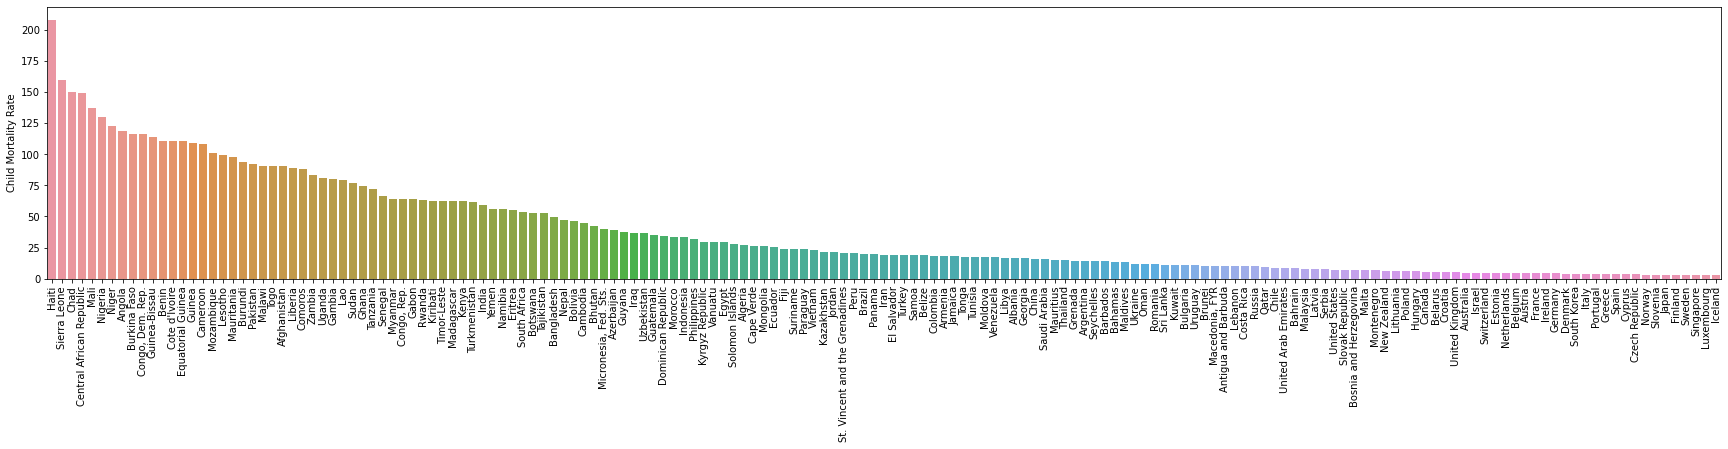

In [16]:
# Child Mortality Rate : Death of children under 5 years of age per 1000 live births
plt.figure(figsize = (30,5))
child_mort = df_corrected[['country','child_mort']].sort_values('child_mort', ascending = False)
ax = sns.barplot(x='country', y='child_mort', data= child_mort)
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

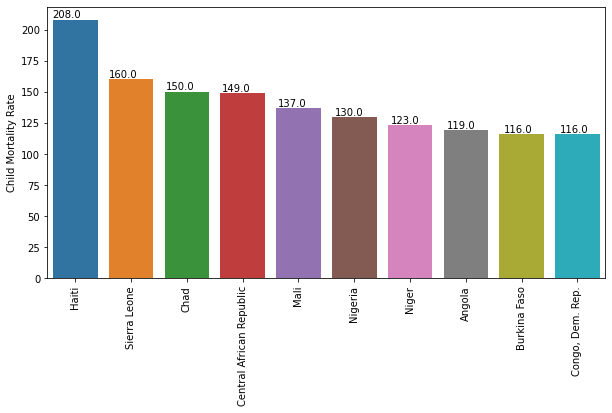

In [17]:
plt.figure(figsize = (10,5))
child_mort_top10 = df_corrected[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
ax = sns.barplot(x='country', y='child_mort', data= child_mort_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

C:\Users\sama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


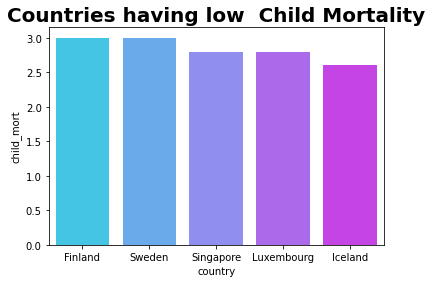

In [18]:
Country= df.groupby('country').child_mort.sum().sort_values(ascending=False)
Country=pd.DataFrame(Country)
Country2=Country.tail()
sns.barplot(Country2.index, Country2.child_mort, palette='cool')
plt.title('Countries having low  Child Mortality',fontweight="bold", size=20)
plt.show()

###### Fertility Rate

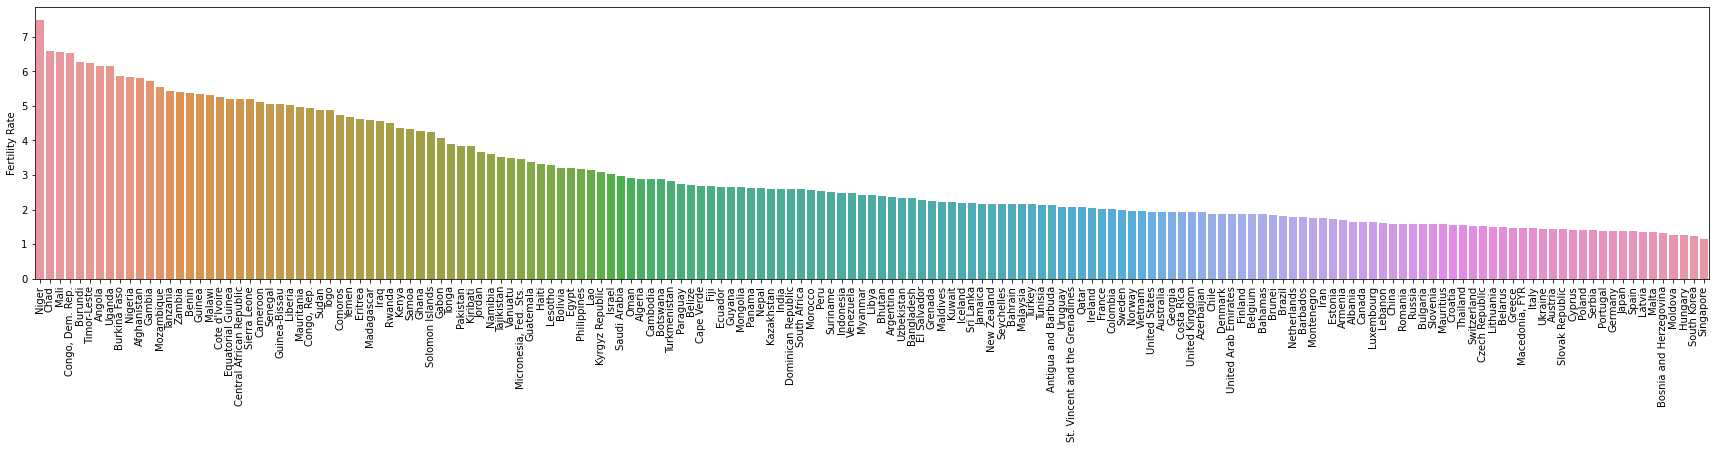

In [19]:
# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
plt.figure(figsize = (30,5))
total_fer = df_corrected[['country','total_fer']].sort_values('total_fer', ascending = False)
ax = sns.barplot(x='country', y='total_fer', data= total_fer)
ax.set(xlabel = '', ylabel= 'Fertility Rate')
plt.xticks(rotation=90)
plt.show()

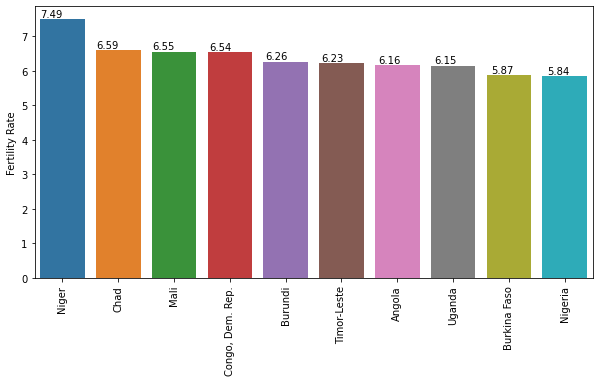

In [20]:
plt.figure(figsize = (10,5))
total_fer_top10 = df_corrected[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
ax = sns.barplot(x='country', y='total_fer', data= total_fer_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Fertility Rate')
plt.xticks(rotation=90)
plt.show()

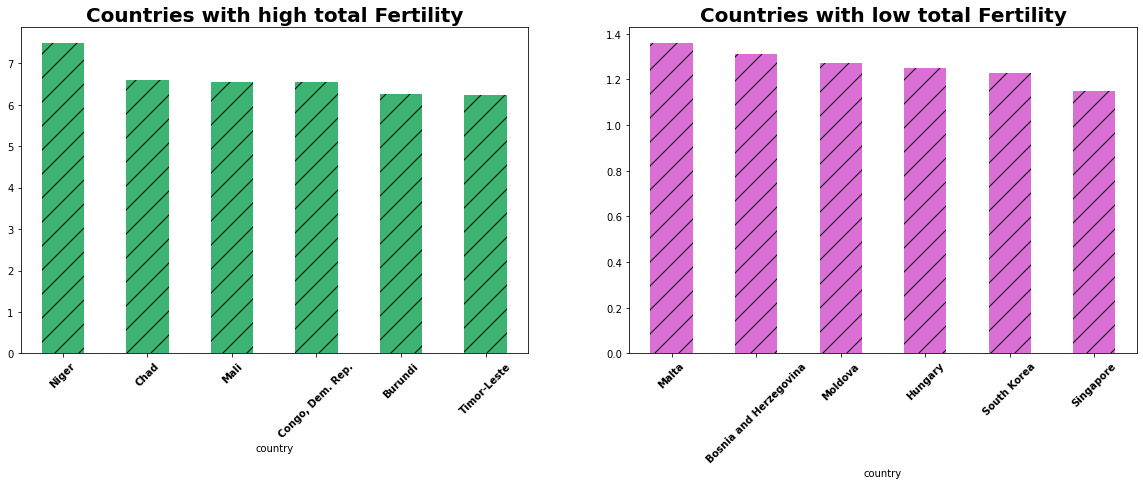

In [21]:
plt.figure(figsize=(20, 6))
Fe=df_corrected.groupby('country').total_fer.sum().sort_values(ascending= False)
plt.subplot(1,2,1)
Fe1=Fe.head(6).plot.bar(color='mediumseagreen',hatch="/")
plt.title('Countries with high total Fertility',fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.subplot(1,2,2)
Fe2=Fe.tail(6).plot.bar(color= 'orchid',hatch='/')
plt.title('Countries with low total Fertility',fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.show()

###### Life Expectancy

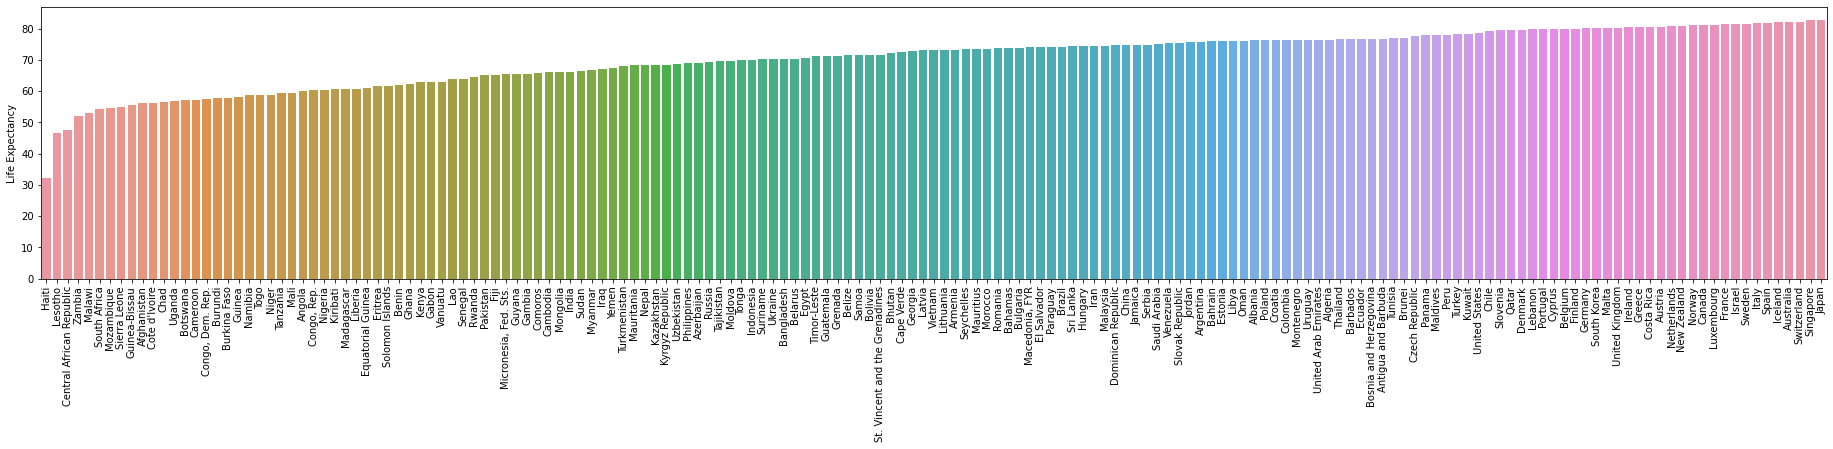

In [22]:
# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same
plt.figure(figsize = (32,5))
life_expec = df_corrected[['country','life_expec']].sort_values('life_expec', ascending = True)
ax = sns.barplot(x='country', y='life_expec', data= life_expec)
ax.set(xlabel = '', ylabel= 'Life Expectancy')
plt.xticks(rotation=90)
plt.show()

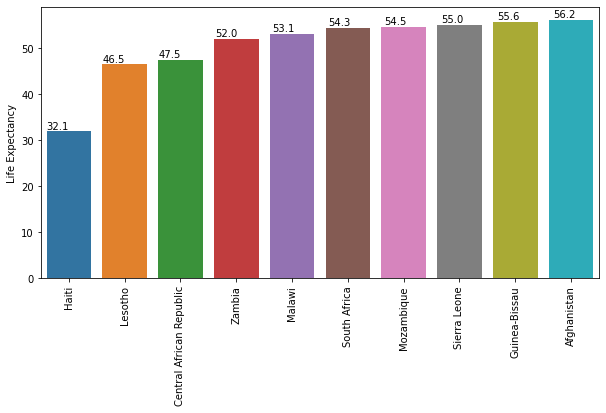

In [23]:
plt.figure(figsize = (10,5))
life_expec_bottom10 = df_corrected[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
ax = sns.barplot(x='country', y='life_expec', data= life_expec_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Life Expectancy')
plt.xticks(rotation=90)
plt.show()

In [24]:
Life_ex=df.sort_values(by=['life_expec'],ascending=False)
display(Life_ex[0:5])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900


###### Health

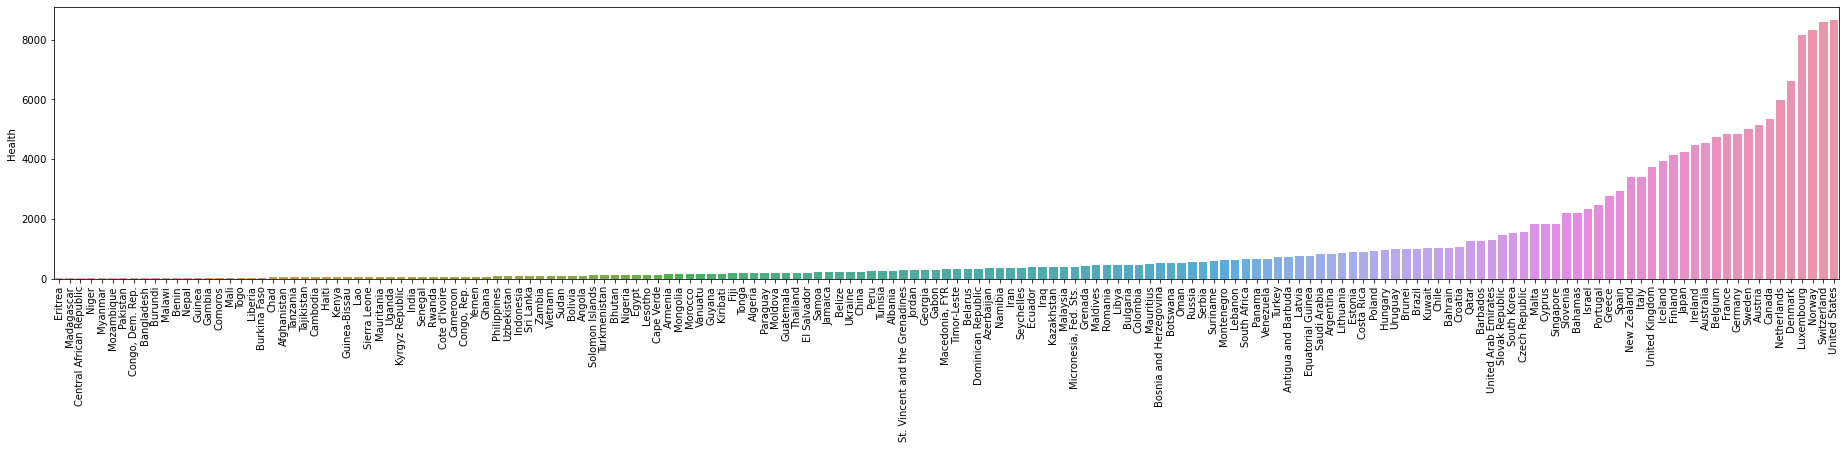

In [25]:
# Health :Total health spending as %age of Total GDP.
plt.figure(figsize = (32,5))
health = df_corrected[['country','health']].sort_values('health', ascending = True)
ax = sns.barplot(x='country', y='health', data= health)
ax.set(xlabel = '', ylabel= 'Health')
plt.xticks(rotation=90)
plt.show()

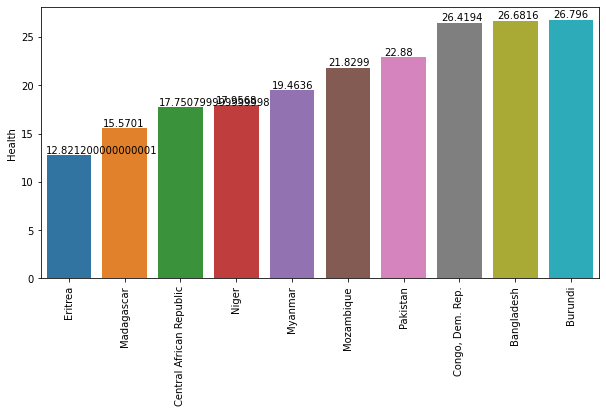

In [26]:
plt.figure(figsize = (10,5))
health_bottom10 = df_corrected[['country','health']].sort_values('health', ascending = True).head(10)
ax = sns.barplot(x='country', y='health', data= health_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Health')
plt.xticks(rotation=90)
plt.show()

In [27]:
Health=df_corrected.sort_values(by=['health'], ascending= True)
Health[0:5]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
50,Eritrea,55.2,23.08780,12.8212,112.306000,1420,11.60,61.7,4.61,482
93,Madagascar,62.2,103.25000,15.5701,177.590000,1390,8.79,60.8,4.60,413
31,Central African Republic,149.0,52.62800,17.7508,118.190000,888,2.01,47.5,5.21,446
112,Niger,123.0,77.25600,17.9568,170.868000,814,2.55,58.8,7.49,348
107,Myanmar,64.4,1.07692,19.4636,0.651092,3720,7.04,66.8,2.41,988


In [28]:
Health1=df_corrected.sort_values(by=['health'], ascending= False)
Health1[0:5]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
159,United States,7.3,6001.6,8663.60,7647.2,49400,1.220,78.7,1.93,48400
145,Switzerland,4.5,47744.0,8579.00,39761.8,55500,0.317,82.2,1.52,74600
114,Norway,3.2,34856.6,8323.44,25023.0,62300,5.950,81.0,1.95,87800
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000


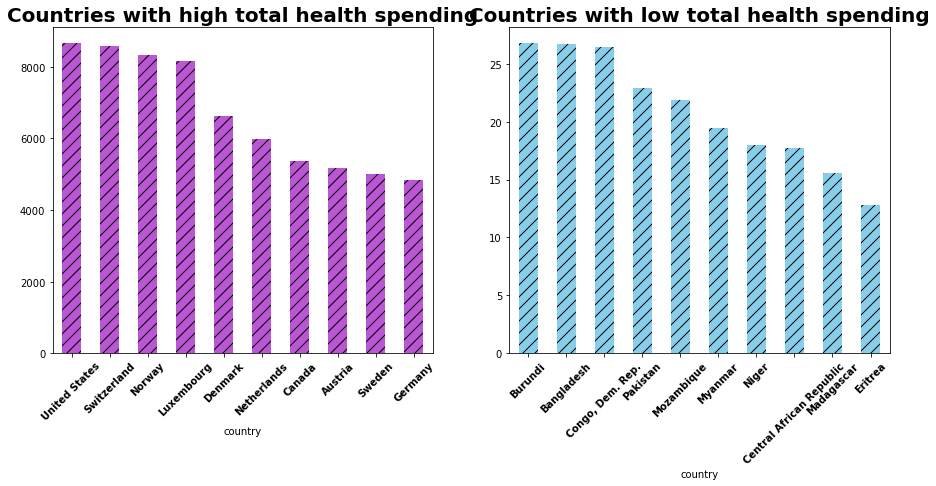

In [29]:
plt.figure(figsize=(15, 6))
He=df_corrected.groupby('country').health.sum().sort_values(ascending= False)
plt.subplot(1,2,1)
He1=He.head(10).plot.bar(color='mediumorchid',hatch="//")
plt.title('Countries with high total health spending',fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.subplot(1,2,2)
He2=He.tail(10).plot.bar(color= 'skyblue',hatch='//')
plt.title('Countries with low total health spending',fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.show()

# Economical Factors

###### Country vs Income

In [30]:
Income= df.groupby('country').income.sum().sort_values(ascending=False)
Income=pd.DataFrame(Income)
Income1=Income.head()
Income2=Income.tail()
display(Income1)
print('*'* 50)
display(Income2)

,income
country,
Qatar,125000
Luxembourg,91700
Brunei,80600
Kuwait,75200
Singapore,72100


**************************************************


,income
country,
Central African Republic,888
Niger,814
Burundi,764
Liberia,700
"Congo, Dem. Rep.",609


C:\Users\sama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


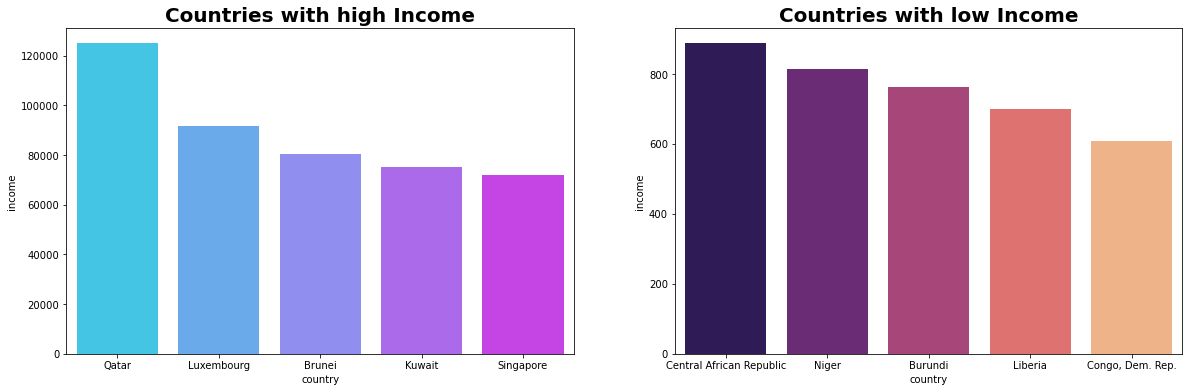

In [31]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(Income1.index, Income1.income, palette='cool')
plt.title('Countries with high Income',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.barplot(Income2.index, Income2.income, palette='magma')
plt.title('Countries with low Income',fontweight="bold", size=20)
plt.show()

###### ## Country vs GDP

In [32]:
GDP= df.groupby('country').gdpp.sum().sort_values(ascending=False)
GDP=pd.DataFrame(GDP)
GDP1=GDP.head()
GDP2=GDP.tail()
display(GDP1)
print('*'* 50)
display(GDP2)

,gdpp
country,
Luxembourg,105000
Norway,87800
Switzerland,74600
Qatar,70300
Denmark,58000


**************************************************


,gdpp
country,
Sierra Leone,399
Niger,348
"Congo, Dem. Rep.",334
Liberia,327
Burundi,231


C:\Users\sama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


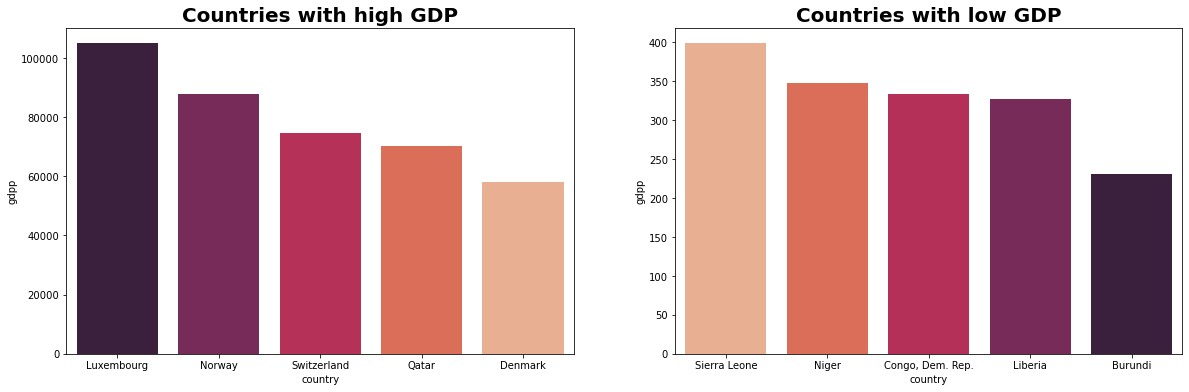

In [33]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(GDP1.index, GDP1.gdpp, palette='rocket')
plt.title('Countries with high GDP',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.barplot(GDP2.index, GDP2.gdpp, palette='rocket_r')
plt.title('Countries with low GDP',fontweight="bold", size=20)
plt.show()

###### Country vs Imports

C:\Users\sama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


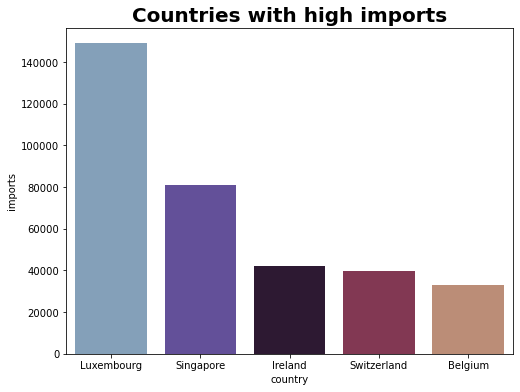

,imports
country,
Luxembourg,149100.0
Singapore,81084.0
Ireland,42125.5
Switzerland,39761.8
Belgium,33166.8


,imports
country,
Burundi,90.552000
Myanmar,0.651092


In [34]:
plt.figure(figsize=(8, 6))
Imports=df_corrected.groupby('country').imports.sum().sort_values(ascending=False)
Imports= pd.DataFrame(Imports)
Imports1=Imports.head()
sns.barplot(Imports1.index,Imports1.imports, palette='twilight')
plt.title('Countries with high imports',fontweight="bold", size=20)
plt.show()
display(Imports1)
Imports2=Imports.tail(2)
display(Imports2)

###### country Vs Exports

In [35]:
Exports=df_corrected.sort_values(by=['exports'], ascending= False)
display(Exports[0:5])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000
133,Singapore,2.8,93200.0,1845.36,81084.0,72100,-0.046,82.7,1.15,46600
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700
145,Switzerland,4.5,47744.0,8579.00,39761.8,55500,0.317,82.2,1.52,74600
123,Qatar,9.0,43796.9,1272.43,16731.4,125000,6.980,79.5,2.07,70300


In [36]:
Export=df_corrected.sort_values(by=['exports'], ascending= True)
display(Export[0:5])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
107,Myanmar,64.4,1.07692,19.4636,0.651092,3720,7.04,66.8,2.41,988
26,Burundi,93.6,20.60520,26.7960,90.552000,764,12.30,57.7,6.26,231
50,Eritrea,55.2,23.08780,12.8212,112.306000,1420,11.60,61.7,4.61,482
31,Central African Republic,149.0,52.62800,17.7508,118.190000,888,2.01,47.5,5.21,446
0,Afghanistan,90.2,55.30000,41.9174,248.297000,1610,9.44,56.2,5.82,553


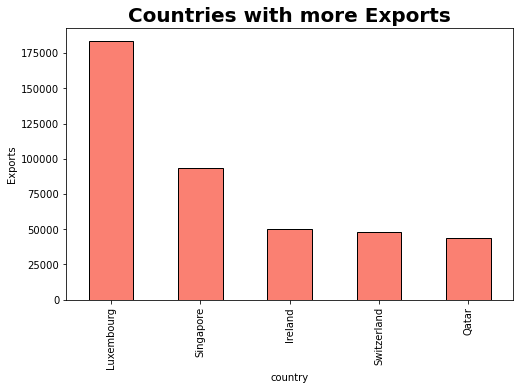

In [37]:
plt.figure(figsize=(8, 5))
df_corrected.groupby('country').exports.sum().sort_values(ascending=False).head().plot.bar(color='salmon',edgecolor='k')
plt.ylabel('Exports')
plt.title('Countries with more Exports',fontweight="bold", size=20)
plt.show()

###### Inflation

In [39]:
In=df_corrected.sort_values(by=['inflation'], ascending=False).head()
In

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.0,60.5,5.84,2330
163,Venezuela,17.1,3847.50,662.850,2376.00,16500,45.9,75.4,2.47,13500
103,Mongolia,26.1,1237.55,144.160,1502.55,7710,39.2,66.2,2.64,2650
149,Timor-Leste,62.6,79.20,328.320,1000.80,1850,26.5,71.1,6.23,3600
49,Equatorial Guinea,111.0,14671.80,766.080,10071.90,33700,24.9,60.9,5.21,17100


In [40]:
In=df_corrected.sort_values(by=['inflation'], ascending=True).head()
In

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
131,Seychelles,14.4,10130.4,367.20,11664.0,20400,-4.210,73.4,2.17,10800
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700
77,Japan,3.2,6675.0,4223.05,6052.0,35800,-1.900,82.8,1.39,44500
43,Czech Republic,3.4,13068.0,1560.24,12454.2,28300,-1.430,77.5,1.51,19800
135,Slovenia,3.2,15046.2,2201.94,14718.6,28700,-0.987,79.5,1.57,23400


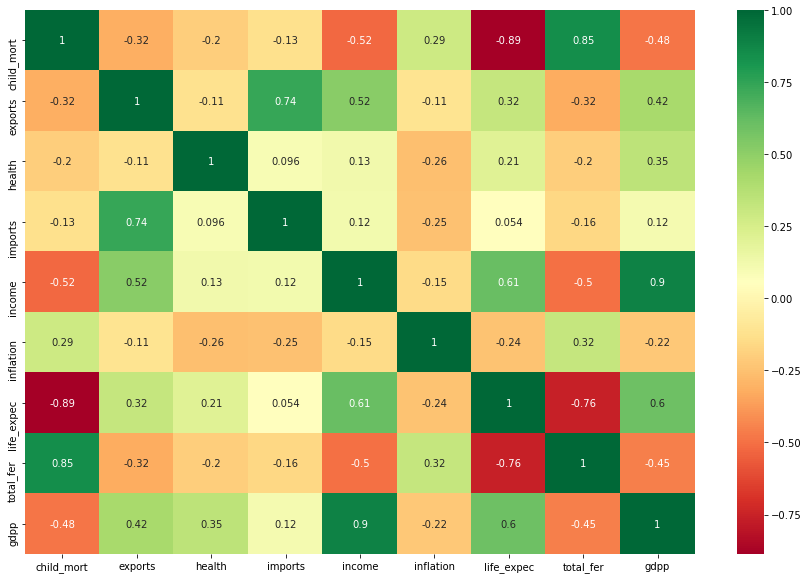

In [41]:
# Heatmap to understand the attributes dependency

plt.figure(figsize = (15,10))        
sns.heatmap(df.corr(),annot = True,cmap='RdYlGn')

plt.show()

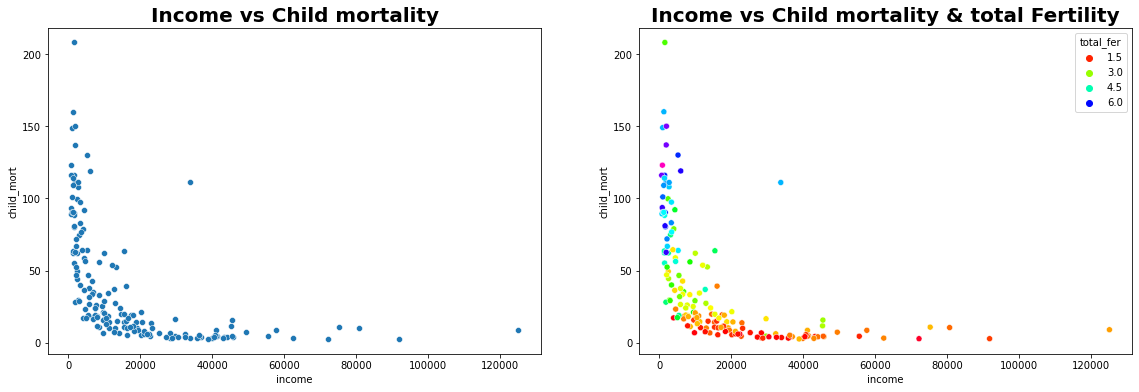

In [42]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='income',y='child_mort', data=df)
plt.title('Income vs Child mortality',fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.scatterplot(x='income',y='child_mort',hue='total_fer', data=df, palette='gist_rainbow')
plt.title('Income vs Child mortality & total Fertility',fontweight="bold", size=20)
plt.subplots_adjust(right=1.2)
plt.show()

C:\Users\sama\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sama\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sama\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

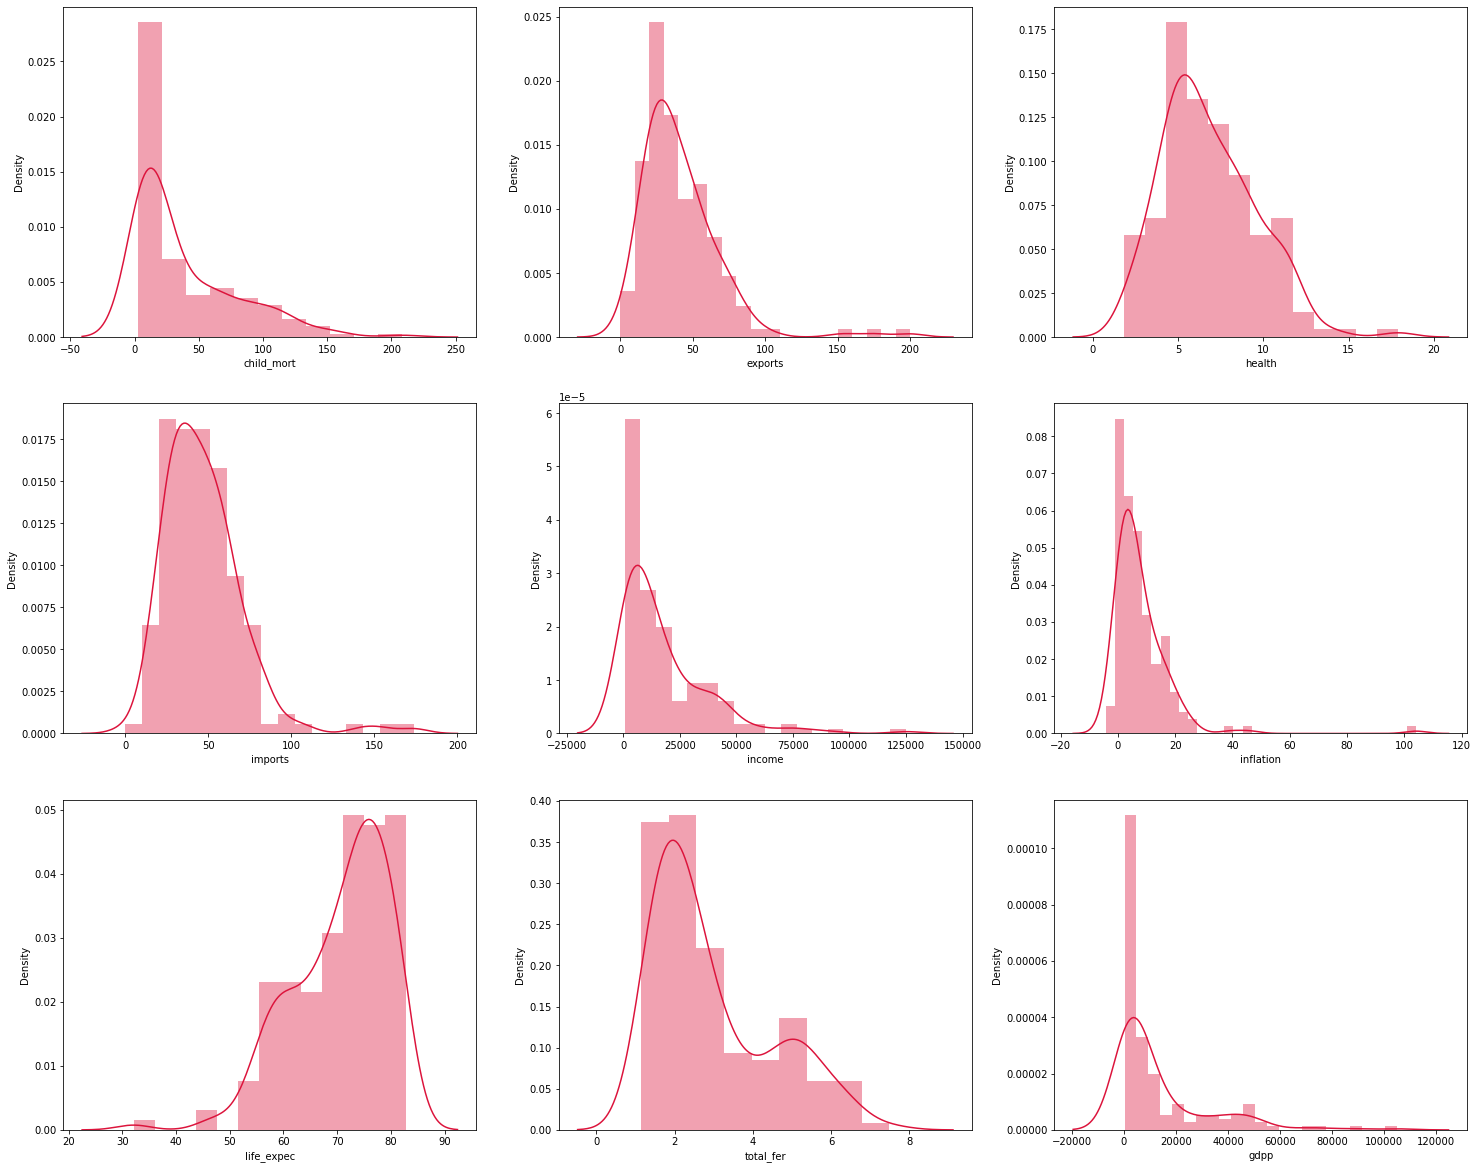

In [43]:
plt.figure(figsize = (20,16))
feature = df_corrected.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(df[i[1]], color='crimson')
    plt.subplots_adjust(right=1.1)
    plt.subplots_adjust(top=1.1)

###### ## Scaling

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_corrected.drop('country', axis = 1))
scaled_df

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [45]:
scaled_df = pd.DataFrame(scaled_df, columns = df_corrected.columns[1:])
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


####  K-Mean Clustering

###### Elbow 

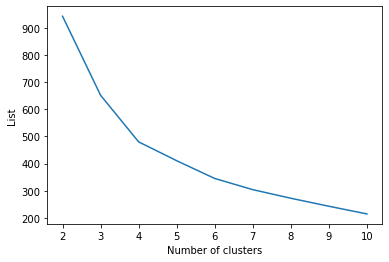

In [46]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(scaled_df)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])
plt.xlabel("Number of clusters")
plt.ylabel("List")
plt.show()

###### Silhouette score

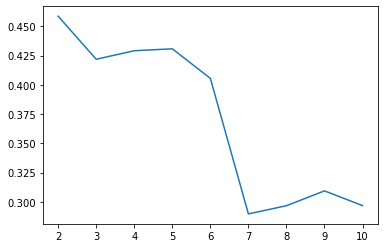

In [47]:
from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(scaled_df)
    ss.append([k, silhouette_score(scaled_df, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

plt.show()

In [48]:
from sklearn.decomposition import PCA

In [49]:
pca=PCA(svd_solver='randomized',random_state=42)    # creating an object for PCA

pca.fit(scaled_df)  

PCA(random_state=42, svd_solver='randomized')

In [50]:
# Defining the components in a new dataframe

col_names=list(scaled_df.columns)
pca_df=pd.DataFrame({'PC1': pca.components_[0],'PC2':pca.components_[1], 'Feature':col_names})
pca_df.head()

,PC1,PC2,Feature
0,-0.316392,0.476267,child_mort
1,0.342887,0.397311,exports
2,0.358535,0.155053,health
3,0.344865,0.370781,imports
4,0.380041,0.128384,income


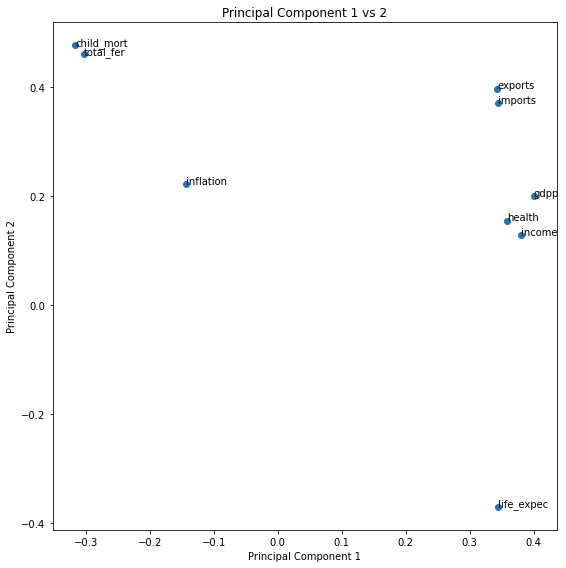

In [51]:
# plotting the two principal components in scatter plot

%matplotlib inline
fig=plt.figure(figsize=(8,8))                 # setting the figure
plt.scatter(pca_df.PC1,pca_df.PC2)            # using scatter plot 
plt.title('Principal Component 1 vs 2')       # setting the title
plt.xlabel('Principal Component 1')           # setting the x-label
plt.ylabel('Principal Component 2')           # setting the x-label

# setting the features name on the datapoints

for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt,(pca_df.PC1[i],pca_df.PC2[i]))
    
plt.tight_layout()    # changing the layout
plt.show()            # showing the plot

In [52]:
pca.explained_variance_ratio_   # check the variance ratio 

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

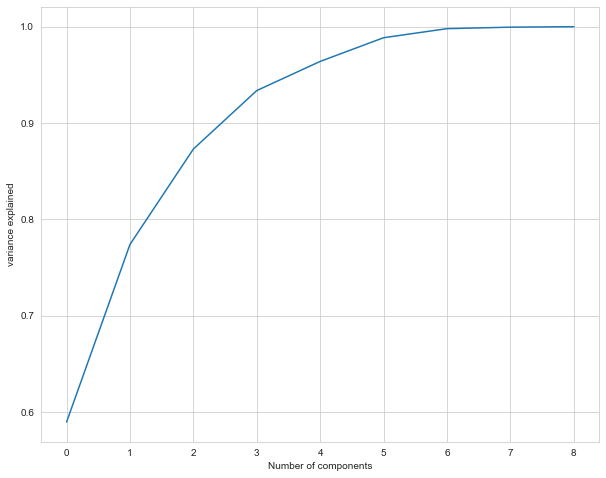

In [53]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))

plt.plot(np.cumsum(pca.explained_variance_ratio_))    # plotting using cumsum

plt.xlabel('Number of components')
plt.ylabel('variance explained')

plt.show()

In [54]:
from sklearn.decomposition import IncrementalPCA
pca_final=IncrementalPCA(n_components=5)
# Choosing k=5 as it explains about 97% of variance - visualized from above plot

In [55]:
# Transformation - getting data on principal components

pca_scaled_df=pca_final.fit_transform(scaled_df)

pca_scaled_df.shape     # shape of the dataset

(167, 5)

<AxesSubplot:title={'center':'Correlation of the variables after PCA - countries'}>

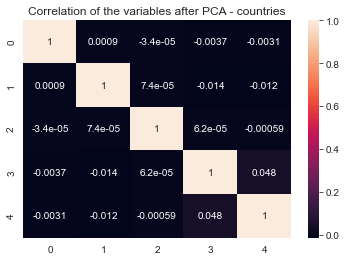

In [56]:
# Checking the correlation of the new dataset(After PCA)

corr_pca=np.corrcoef(pca_scaled_df.transpose())
plt.title("Correlation of the variables after PCA - countries")

sns.heatmap(corr_pca,annot=True)   # Plotting heatmap

In [57]:
# Creating new dataframe for the new dataset with new columns names

new_dataset=pd.DataFrame(pca_scaled_df)

new_dataset=new_dataset.rename(columns={0:'PC1',1:'PC2',2:'PC3',3:'PC4',4:'PC5',5:'PC6'})

new_dataset.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


In [58]:
# Silhouette analysis


clusters_range=[2,3,4,5,6,7,8,9]                                        # selecting range of clusters
for i in clusters_range:                                                # For loop
    kmeans=KMeans(n_clusters=i,max_iter=500)                            # Using iteration 500 for finding Kmeans
    kmeans.fit(new_dataset)                                             # fitting the kmeans
    cluster_label=kmeans.labels_                                        # saving the labels in a cluster_label list
    
    silhouette_Score=silhouette_score(new_dataset,cluster_label)        # finding the silhouette score 
    
    # Printing for all number of clusters of range(2,10) for silhouette score
    
    print("For no. of cluster={0},silhouette score is {1}".format(i,silhouette_Score)) 

For no. of cluster=2,silhouette score is 0.48066046782755917
For no. of cluster=3,silhouette score is 0.45415128979715086
For no. of cluster=4,silhouette score is 0.46298146414826113
For no. of cluster=5,silhouette score is 0.4650032850035714
For no. of cluster=6,silhouette score is 0.4435967360285539
For no. of cluster=7,silhouette score is 0.3671461441317749
For no. of cluster=8,silhouette score is 0.3593281557194193
For no. of cluster=9,silhouette score is 0.3648403627234686


In [59]:
kmeans=KMeans(n_clusters=4,max_iter=500,random_state=42)         # k=4 and iteration=500
kmeans.fit(new_dataset) 

KMeans(max_iter=500, n_clusters=4, random_state=42)

In [60]:
# New dataset cluster labels

kmeans.labels_ 

array([2, 0, 0, 2, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 2,
       0, 3, 0, 2, 2, 0, 2, 3, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 3, 0,
       3, 0, 0, 0, 0, 2, 2, 0, 0, 3, 3, 2, 2, 0, 3, 2, 3, 0, 0, 2, 2, 0,
       2, 0, 3, 0, 0, 0, 2, 3, 3, 3, 0, 3, 0, 0, 2, 2, 3, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 3, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       3, 3, 2, 2, 3, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 3, 2, 2, 0, 3, 0, 0, 2, 0, 3, 3, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 3, 3, 3, 0, 0, 0, 0, 0, 2, 2])

In [61]:
# Uploading the cluster labels in our original dataset

df_corrected['Cluster_id']=kmeans.labels_
df_corrected.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


<AxesSubplot:title={'center':'Cluster level vs GDPP per capita'}, xlabel='Cluster_id', ylabel='gdpp'>

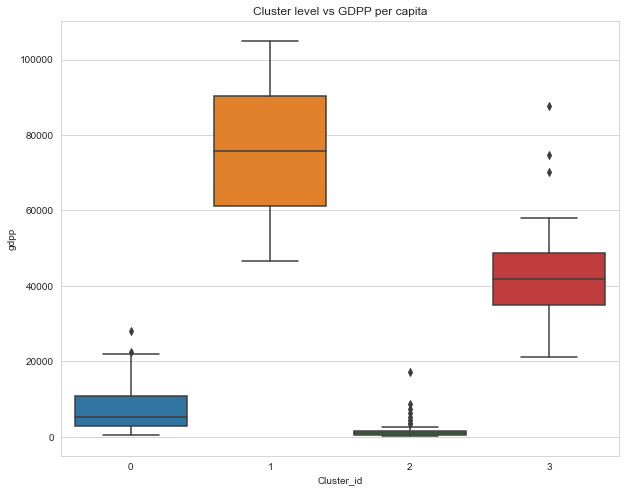

In [62]:
# Visualising the distribution of the cluster labels for column 'gdpp'

plt.figure(figsize=(10,8))
plt.title('Cluster level vs GDPP per capita')
sns.boxplot(x='Cluster_id',y='gdpp',data=df_corrected)

<AxesSubplot:title={'center':'Cluster level vs Child Mortality'}, xlabel='Cluster_id', ylabel='child_mort'>

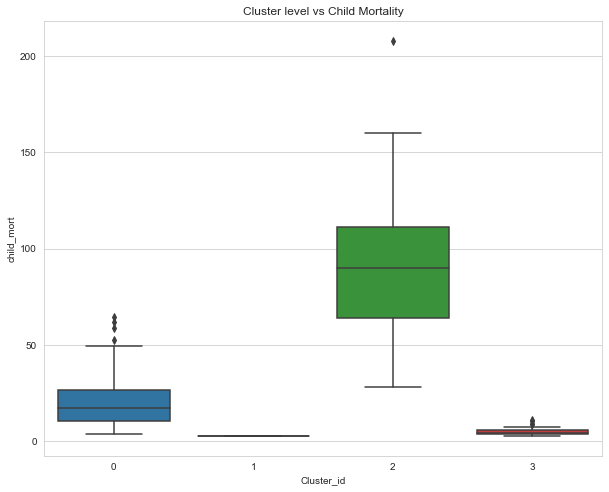

In [63]:
# Visualising the distribution of the cluster labels for column 'child_mort' using boxplot

plt.figure(figsize=(10,8))                    # setting figure size
plt.title('Cluster level vs Child Mortality') # Setting the title

sns.boxplot(x='Cluster_id',y='child_mort',data=df_corrected)  # Using boxplot

<AxesSubplot:title={'center':'Cluster level vs Income'}, xlabel='Cluster_id', ylabel='income'>

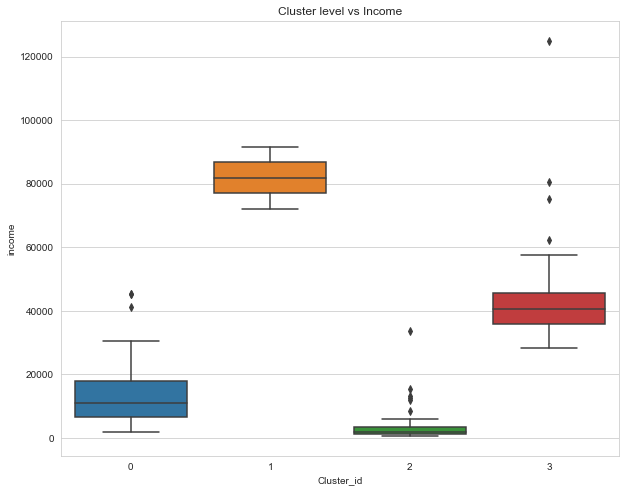

In [64]:
# Visualising the distribution of the cluster labels for column 'income'

plt.figure(figsize=(10,8))
plt.title('Cluster level vs Income')
sns.boxplot(x='Cluster_id',y='income',data=df_corrected)

In [65]:
# Data Transformation of the new_dataset

new_dataset['Cluster_label']=kmeans.labels_     # Adding cluster label to principal components

new_dataset.set_index(df_corrected.index,inplace=True)  # Adding country to the index for the new_dataset

df5=pd.merge(df_corrected,new_dataset, left_index=True,right_index=True)
new_dataset.head()

,PC1,PC2,PC3,PC4,PC5,Cluster_label
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,2
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,0
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,0
3,-2.723472,2.174966,0.597397,0.417695,0.056694,2
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,0


In [66]:

df_corrected.set_index(df_corrected['country'],inplace=True)

### Visualisation of PC1 and PC2

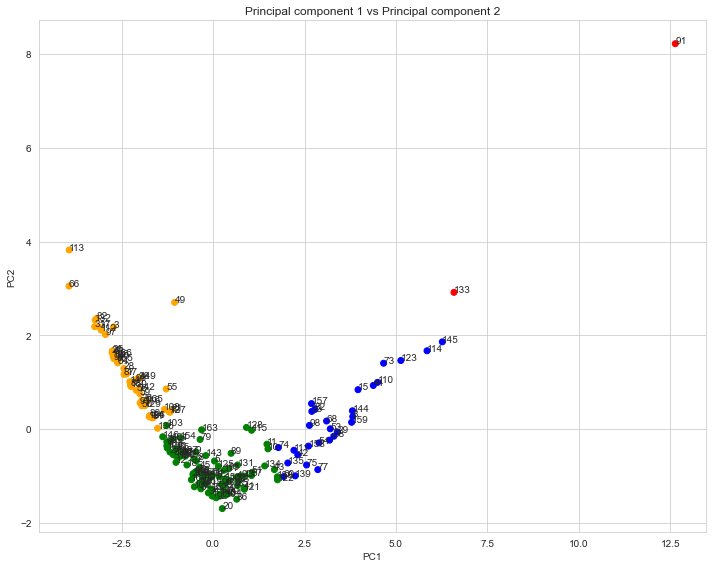

In [67]:
# Visualising the clusters formed by choosing first two pricipal components(on X-Y axes)

%matplotlib inline                  
fig = plt.figure(figsize = (10,8))   # setting the figure size


plt.title("Principal component 1 vs Principal component 2")

# Plotting a scatter plot

plt.scatter(new_dataset.iloc[:,0], new_dataset.iloc[:,1],
            c = new_dataset.Cluster_label.map({0:'green',1:'red',2:'orange',3:'blue'}))

# labeling different cluster points with country names 

for i, txt in enumerate(new_dataset.index):
    plt.annotate(txt, (new_dataset.PC1[i],new_dataset.PC2[i]))

# labeling the axes

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()   # changing the layout
plt.show()           

### Visualizing with original variables (Child_mort vs gdpp)

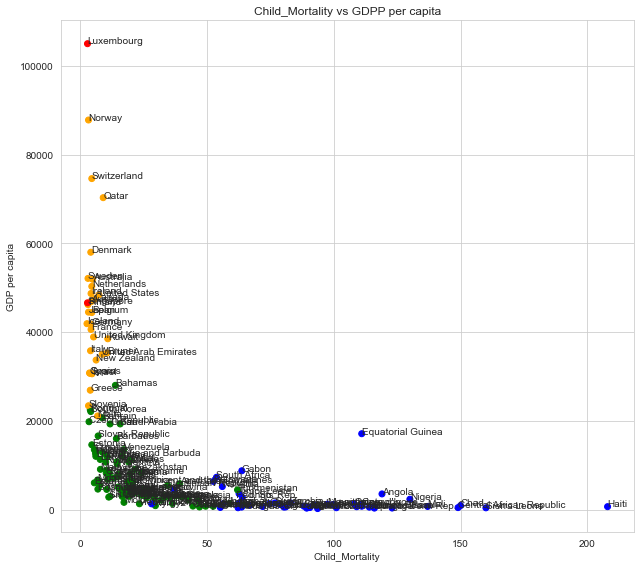

In [68]:
# Visualising the clusters formed with origibal varaibles(on X-Y axes)

%matplotlib inline                  
fig = plt.figure(figsize = (9,8))   # setting the figure size

# Plotting a scatter plot

plt.scatter(df_corrected['child_mort'], df_corrected['gdpp'],
            c =new_dataset.Cluster_label.map({0:'green',1:'red',2:'blue',3:'orange'}))

# labeling different cluster points with country names 

for i, txt in enumerate(df_corrected.index):
    plt.annotate(txt, (df_corrected.child_mort[i],df_corrected.gdpp[i]))

# labeling the axes and title

plt.title('Child_Mortality vs GDPP per capita')
plt.xlabel('Child_Mortality')
plt.ylabel('GDP per capita')

plt.tight_layout()  # changing the layout

plt.show()           

In [69]:
#Finding the countries with cluster label=2

Country_help=pd.DataFrame(new_dataset[new_dataset['Cluster_label']==2].index)

Country_help.shape

(48, 1)

In [70]:
# Finding the countries with cluster label=1

Country_nohelp=pd.DataFrame(new_dataset[new_dataset['Cluster_label']==1].index)

Country_nohelp.shape

(2, 1)

In [86]:
######pca

In [71]:
pca_final = IncrementalPCA(n_components=4)

In [72]:
df_scaled_pca = pca_final.fit_transform(scaled_df)
print(df_scaled_pca.shape)
print(type(df_scaled_pca))

(167, 4)
<class 'numpy.ndarray'>


In [73]:
df_pca = pd.DataFrame(df_scaled_pca)
df_pca.columns = ['PC1', 'PC2', 'PC3', 'PC4']
df_pca.shape

(167, 4)

In [74]:
kmeans = KMeans(n_clusters=3, max_iter=50, random_state = 100)
kmeans.fit(new_dataset)
kmeans.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [75]:

df_pca_final_3 = df_corrected2.copy()
df_pca_final_3['Cluster_label'] = kmeans.labels_

In [76]:
#Let's see numbers of countries in each cluster
print('Number of countries in cluster-0:', len(list(df_pca_final_3[df_pca_final_3['Cluster_label'] == 0]['country'])))
print('Number of countries in cluster-1:', len(list(df_pca_final_3[df_pca_final_3['Cluster_label'] == 1]['country'])))
print('Number of countries in cluster-2:', len(list(df_pca_final_3[df_pca_final_3['Cluster_label'] == 2]['country'])))

Number of countries in cluster-0: 31
Number of countries in cluster-1: 88
Number of countries in cluster-2: 48


In [77]:
df_pca_final_3

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id,Cluster_label
country,,,,,,,,,,,,
Afghanistan,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,2
Albania,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,1
Algeria,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,1
Angola,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,2
Antigua and Barbuda,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,0,1
Venezuela,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500,0,1
Vietnam,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,0,1


In [78]:
child_mort_list = [df_pca_final_3[df_pca_final_3['Cluster_label'] == 0]['child_mort'].mean(), 
                   df_pca_final_3[df_pca_final_3['Cluster_label'] == 1]['child_mort'].mean(),
                  df_pca_final_3[df_pca_final_3['Cluster_label'] == 2]['child_mort'].mean()]

exports_list = [df_pca_final_3[df_pca_final_3['Cluster_label'] == 0]['exports'].mean(), 
                   df_pca_final_3[df_pca_final_3['Cluster_label'] == 1]['exports'].mean(),
                  df_pca_final_3[df_pca_final_3['Cluster_label'] == 2]['exports'].mean()]


imports_list = [df_pca_final_3[df_pca_final_3['Cluster_label'] == 0]['imports'].mean(), 
                   df_pca_final_3[df_pca_final_3['Cluster_label'] == 1]['imports'].mean(),
                  df_pca_final_3[df_pca_final_3['Cluster_label'] == 2]['imports'].mean()]

health_list = [df_pca_final_3[df_pca_final_3['Cluster_label'] == 0]['health'].mean(), 
                   df_pca_final_3[df_pca_final_3['Cluster_label'] == 1]['health'].mean(),
                  df_pca_final_3[df_pca_final_3['Cluster_label'] == 2]['health'].mean()]

income_list = [df_pca_final_3[df_pca_final_3['Cluster_label'] == 0]['income'].mean(), 
                   df_pca_final_3[df_pca_final_3['Cluster_label'] == 1]['income'].mean(),
                  df_pca_final_3[df_pca_final_3['Cluster_label'] == 2]['income'].mean()]

inflation_list = [df_pca_final_3[df_pca_final_3['Cluster_label'] == 0]['inflation'].mean(), 
                   df_pca_final_3[df_pca_final_3['Cluster_label'] == 1]['inflation'].mean(),
                  df_pca_final_3[df_pca_final_3['Cluster_label'] == 2]['inflation'].mean()]

life_expec_list = [df_pca_final_3[df_pca_final_3['Cluster_label'] == 0]['life_expec'].mean(), 
                   df_pca_final_3[df_pca_final_3['Cluster_label'] == 1]['life_expec'].mean(),
                  df_pca_final_3[df_pca_final_3['Cluster_label'] == 2]['life_expec'].mean()]

total_fer_list = [df_pca_final_3[df_pca_final_3['Cluster_label'] == 0]['total_fer'].mean(), 
                   df_pca_final_3[df_pca_final_3['Cluster_label'] == 1]['total_fer'].mean(),
                  df_pca_final_3[df_pca_final_3['Cluster_label'] == 2]['total_fer'].mean()]

gdpp = [df_pca_final_3[df_pca_final_3['Cluster_label'] == 0]['gdpp'].mean(), 
                   df_pca_final_3[df_pca_final_3['Cluster_label'] == 1]['gdpp'].mean(),
                  df_pca_final_3[df_pca_final_3['Cluster_label'] == 2]['gdpp'].mean()]

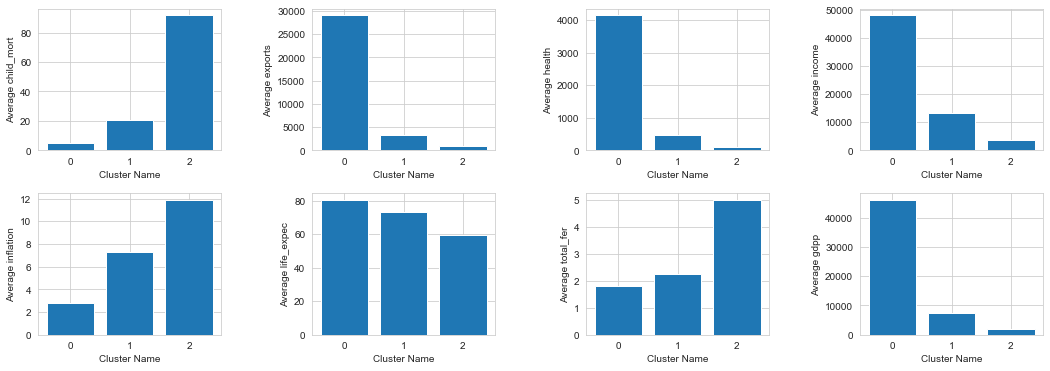

In [79]:
clusters = [0, 1, 2]

fig = plt.figure(figsize = (18,6))
plt.subplot(2,4,1)
plt.bar(clusters, child_mort_list)
plt.xlabel('Cluster Name')
plt.ylabel('Average child_mort')

plt.subplot(2,4,2)
plt.bar(clusters, exports_list)
plt.xlabel('Cluster Name')
plt.ylabel('Average exports')

plt.subplot(2,4,3)
plt.bar(clusters, health_list)
plt.xlabel('Cluster Name')
plt.ylabel('Average health')

plt.subplot(2,4,4)
plt.bar(clusters, income_list)
plt.xlabel('Cluster Name')
plt.ylabel('Average income')

plt.subplot(2,4,5)
plt.bar(clusters, inflation_list)
plt.xlabel('Cluster Name')
plt.ylabel('Average inflation')

plt.subplot(2,4,6)
plt.bar(clusters, life_expec_list)
plt.xlabel('Cluster Name')
plt.ylabel('Average life_expec')

plt.subplot(2,4,7)
plt.bar(clusters, total_fer_list)
plt.xlabel('Cluster Name')
plt.ylabel('Average total_fer')

plt.subplot(2,4,8)
plt.bar(clusters, gdpp)
plt.xlabel('Cluster Name')
plt.ylabel('Average gdpp')

plt.subplots_adjust(wspace = .5, hspace = .3)


In [80]:
#Countries in cluster-2
print('\033[1m Countries in Cluster-2 (Poor Countries) : \033[0m')
print(list(df_pca_final_3[df_pca_final_3['Cluster_label'] == 2]['country']))

 Countries in Cluster-2 (Poor Countries) : 
['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']


In [81]:
#Countries in cluster-1
print('\033[1m Countries in Cluster-1 (Developing Countries) : \033[0m')
print(list(df_pca_final_3[df_pca_final_3['Cluster_label'] == 1]['country']))

 Countries in Cluster-1 (Developing Countries) : 
['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Slovak Republic', 'South Korea', 'Sri Lanka', 'St. Vincent and the Grenadine

In [82]:
#Countries in cluster-0
print('\033[1m Countries in Cluster-0 (Developed Countries) : \033[0m')
print(list(df_pca_final_3[df_pca_final_3['Cluster_label'] == 0]['country']))

 Countries in Cluster-0 (Developed Countries) : 
['Australia', 'Austria', 'Belgium', 'Brunei', 'Canada', 'Cyprus', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Qatar', 'Singapore', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States']


In [83]:
df_poor = df_pca_final_3[df_pca_final_3['Cluster_label'] == 2]
df_poor.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id,Cluster_label
country,,,,,,,,,,,,
Afghanistan,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553,2,2
Angola,Angola,119.0,2199.190,100.6050,1514.370,5900,22.400,60.1,6.16,3530,2,2
Benin,Benin,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758,2,2
Botswana,Botswana,52.5,2768.600,527.0500,3257.550,13300,8.920,57.1,2.88,6350,2,2
Burkina Faso,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.810,57.9,5.87,575,2,2


In [84]:
df_final_poor = df_poor[df_poor['income'] < np.percentile(df_poor.income,25)].sort_values(by='income')
df_final_poor.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id,Cluster_label
country,,,,,,,,,,,,
"Congo, Dem. Rep.","Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2,2
Liberia,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,2,2
Burundi,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2,2
Niger,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2,2
Central African Republic,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,2,2
Mozambique,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,2,2
Malawi,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,2,2
Guinea,Guinea,109.0,196.3440,31.9464,279.936,1190,16.10,58.0,5.34,648,2,2
Togo,Togo,90.3,196.1760,37.3320,279.624,1210,1.18,58.7,4.87,488,2,2
